In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import ast

In [202]:
#import data
df = pd.read_csv('cleaned sephora crawl.csv', index_col=0)

In [203]:
#clean up productsize column
ind = []
not_string = []
for i in range(len(df)):
    if type(df.productsize[i]) == str:
        result = re.search('^\d{0,3}\.?\d{0,2} [ozmL]+$', df.productsize[i])
        if result == None:
            ind.append(i)
    else:
        not_string.append(i)

In [205]:
#analyze null productsizes
df[df.productsize.isnull()]

,url,category,brand,name,rating,price,descriptions,productsize,ingredients_cleaned
1219,https://www.sephora.com/product/shiseido-urban...,sunscreen,Shiseido,Urban Environment Daily SPF Defense,4.3,$35.00,What it is: A three-piece set starring a full-...,NaN,"Octinoxate 4.9%, Octocrylene 3.0%, Zinc Oxide ..."


In [206]:
#fill null productsizes with not listed
df.productsize.fillna('not listed', inplace=True)

In [204]:
#analyze incorrectly formatted productsizes
df.loc[ind].productsize.value_counts()

not listed                32
Standard Size - 1 oz       4
1.7 oz•ITEM 1680818        3
1.69 fl oz                 2
1.69 oz•ITEM 886457        2
                          ..
4 patches•ITEM 2196459     1
4.2 oz•ITEM 1809409        1
4 patches•ITEM 2196483     1
1.7 oz•ITEM 1260397        1
8.5 oz•ITEM 1843788        1
Name: productsize, Length: 115, dtype: int64

In [208]:
#delete item number
result = []
for i in range(len(df)):
    result.append(df.productsize[i].split('•')[0])
df.productsize = result

In [210]:
#clean up ingredients
inds = df[df.ingredients_cleaned.str.contains('clean', case=False)].index.to_list()

In [215]:
for i in inds:
    fixed = df.ingredients_cleaned[i].replace('Clean at Sephora products are formulated without:\nSulfates—SLS + SLES, Parabens, Formaldehydes, Formaldehyde-releasing agents, Phthalates, Mineral Oil, Retinyl Palmitate, Oxybenzone, Coal Tar, Hydroquinone, Triclosan, Triclocarban, Undisclosed synthetic fragrances (Products can be formulated with disclosed synthetic fragrances that meet the following two criteria: (1) the synthetic fragrances do not include any of the ingredients listed in numbers 1 through 12 above and (2) the synthetic fragrances are at a concentration below 1% of the total formula) The following type of acrylates: (ethyl acrylate, ethyl methacrylate, methyl methacrylate, butyl methacrylate, hydroxypropyl methacrylate, tetrahydrofurfuryl methacrylate, trimethylolpropane trimethacrylate , aluminum salts), Animal Oils/Musks/Fats, Benzophenone + Related Compounds, Butoxyethanol, Carbon Black, Lead/Lead Acetate, Methyl Cellosolve + Methoxyethanol, Methylchloroisothiazolinone & Methylisothiazolinone, Mercury + Mercury Compounds (Thimerisol), Insoluble Plastic Microbeads (This prohibited ingredient applies to products that are meant to be rinsed off ), Resorcinol, Talc (Talc that is free of any asbestos can be used in the formulation provided that Brand conducts testing to ensure that talc is free of any asbestos.), Toluene, Butylated hydroxyanisole (BHA), Butylated hydroxytoluene (BHT) that is 0.1% or more of total formula, Ethanolamines DEA/TEA/MEA/ETA, Nanoparticles as defined by the European Commission, Petrolatum and Parrafin that is not USP grade, Phenoxyethanol that is 1% or more of total formulation, Polyacrylamide & Acrylamide, The following types of Styrene (Bromostyrene, Deastyrene/acrylates/dvbcopolymer, sodium styrene/divinylbenzene copolymer, styrene oxide, styrene), 1,4 Dioxane in final formulas must comply with the thresholds as follows: (10 or < ppm for products that are meant to be rinsed off, wiped off or removed, 3ppm or < for products that are meant to remain on the skin).', '')
    df.loc[inds, 'ingredients_cleaned'] = fixed

In [216]:
df[df.ingredients_cleaned.str.contains('clean', case=False)].index

Int64Index([], dtype='int64')

In [225]:
#drop rows with ingredient strings less than 100 characters
inds=[]
for i in range(len(df)):
    try:
        length = len(df.ingredients_cleaned.loc[i])
        if length < 100:
            inds.append(i)
    except:
        pass

In [ ]:
df.drop(inds, inplace=True)

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1374
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  1364 non-null   object 
 1   category             1364 non-null   object 
 2   brand                1364 non-null   object 
 3   name                 1364 non-null   object 
 4   rating               747 non-null    float64
 5   price                1364 non-null   object 
 6   descriptions         1364 non-null   object 
 7   productsize          1364 non-null   object 
 8   ingredients_cleaned  1364 non-null   object 
dtypes: float64(1), object(8)
memory usage: 106.6+ KB


In [293]:
df.sample(20)

,url,category,brand,name,rating,price,descriptions,productsize,ingredients_cleaned
223,https://www.sephora.com/product/waso-quick-gen...,cleanser,Shiseido,WASO: Gentle Cleanser,4.1,$28.00,What it is: A gentle daily gel cleanser that f...,5 oz,"Water, Sodium Laureth Sulfate, Cocamidopropyl ..."
536,https://www.sephora.com/product/clinique-id-yo...,serum,CLINIQUE,Clinique iD™: Moisturizer + Concentrate for Po...,3.2,$39.50,What it is: A first-of-its-kind custom blend o...,4.2 oz,Active Cartridge Concentrate for Pores & Uneve...
92,https://www.sephora.com/product/rinse-off-foam...,cleanser,CLINIQUE,Rinse-Off Foaming Cleanser,4.5,$22.50,What it is:\nA cream-mousse cleanser that gent...,5 oz,"Water , Potassium Myristate , Glycerin , Potas..."
1373,https://www.sephora.com/product/advanced-time-...,sunscreen,Estée Lauder,Advanced Time Zone SPF 15- Normal/Combination ...,3.7,$82.00,What it is: A face cream that helps boost hyal...,1.7 oz,"Water, Butylene Glycol, Glycerin, Octyldodecyl..."
789,https://www.sephora.com/product/bye-bye-rednes...,moisturizer,IT Cosmetics,Bye Bye Redness Neutralizing Color-Correcting ...,NaN,$34.00,Skin type:\n✔ Normal\n✔ Dry\n✔ Combination\n✔ ...,0.37 oz,"Cyclopentasiloxane, Water, Silica, Peg/Ppg-18/..."
1368,https://www.sephora.com/product/anti-aging-arm...,sunscreen,IT Cosmetics,Anti-Aging Armour Tinted Sunscreen SPF 50+,4.0,$38.00,Which skin type is it good for?\n✔ Normal\n✔ O...,1 oz,"Water, Cyclopentasiloxane, Butyloctyl Salicyla..."
716,https://www.sephora.com/product/creme-de-la-me...,moisturizer,La Mer,Crème de la Mer Moisturizer,NaN,$190.00,What it is: A luxuriously rich cream that thor...,1 oz,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
824,https://www.sephora.com/product/goop-goopgenes...,moisturizer,goop,GOOPGENES All-In-One Nourishing Face Cream,NaN,$95.00,"What it is: A luxuriously rich, clinically tes...",1.7 oz,"Water/Aqua/Eau, Glycerin, Shorea Stenoptera Se..."
1218,https://www.sephora.com/product/urban-environm...,sunscreen,Shiseido,Urban Environment Oil-Free UV Protector Broad ...,NaN,$35.00,Which skin type is it good for?\n✔ Normal\n✔ O...,1 oz,"Water, Dimethicone, Isododecane, Sd Alcohol 40..."
644,https://www.sephora.com/product/clearcalm-non-...,serum,REN Clean Skincare,ClearCalm Non-Drying Acne Treatment Gel,4.3,$20.00,"What it is: A clean, vegan, fast-acting gel fo...",0.5 oz,"Salicylic Acid 0.50%, Aqua (Water), Alcohol De..."


In [296]:
#split ingredient strings into a list of ingredients
df['ingredient_list'] = df.ingredients_cleaned.str.split(',')

In [302]:
#remove ingredients that are over 100 characters from ingredient list
for product in df.ingredient_list:
    for ing in product:
        if len(ing) >100:
            product.remove(ing)

In [311]:
#remove ingredients that start with a dash
for product in df.ingredient_list:
    for ing in product:
        if re.match('^-',ing):
            product.remove(ing)

In [317]:
#drop rows without ingredients
inds = []
for i, product in enumerate(df.ingredient_list):
    if len(product) == 0:
        inds.append(i)

In [322]:
df.drop(df.iloc[inds].index, inplace=True)

In [368]:
#drop outlier row
inds = df[df.num_ingredients > 100].index.to_list()

In [367]:
df.drop(inds, inplace=True)

In [392]:
#drop rows with 5 ingredients or less
inds = df[df.num_ingredients<=5].index.to_list()

In [396]:
df.drop(inds, inplace=True)

In [431]:
#remove phrases with a colon in ingredients  
inds = df[df.ingredients_cleaned.str.contains(':')].index.to_list()

In [423]:
for i in inds:
    if ':' in df.loc[i, 'ingredient_list'][0]:
        df.loc[i, 'ingredient_list'] = df.loc[i, 'ingredient_list'][1:]

Pekee Bar™:
Sodium Coco-Sulfate 

Perfectly Clean Mlt-Act Fm Cl/Pr M Division: El (Estee Lauder)Ingredients: Water  

Pekee Bar™: Sodium Coco-Sulfate 

Radiant Vitality 2 In 1 Foam Clnsr Division: El (Estee Lauder)Ingredients: Water  

Advanced Night Micro Cleansing Fm Division: El (Estee Lauder)Ingredients: Water  

Advanced Night Micro Cleansng Balm Division: El (Estee Lauder)Ingredients: Ethylhexyl Palmitate  

Soft Clean Moist Rich Fmg Clns Division: El (Estee Lauder)Ingredients: Potassium Cocoyl Glycinate  

The Method: Polish Normal-Combination Skin:
Butylene Glycol 

The Method: Polish Oily-Congested Skin:
Water 

Pumpkin Enzyme Mask Enzymatic Dermal Resurfacer:
Water/Aqua/Eau 

C-Firma™ Day Serum:
Water 

Lala Retro™ Whipped Cream:
Water 

Lifting Phase:
Isoamyl Laurate 

Idealist Extra Pore Min Skin Refin Division: El (Estee Lauder)Ingredients: Water  

Active Cartridge Concentrate for Fatigue:
Water 

Active Cartridge Concentrate for Pores & Uneven Texture:
Water 

Base Conce

In [458]:
df.reset_index(drop=True, inplace=True)

In [512]:
#calculate number of ingredients in each product
df['num_ingredients'] = df.ingredient_list.apply(len)

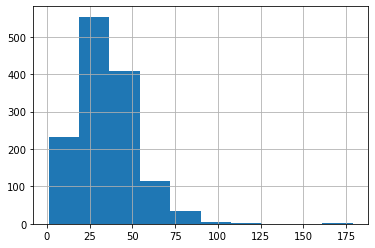

In [370]:
#distribution of the number of ingredients in each product
df.num_ingredients.hist()

In [538]:
#convert ml/mL to oz
ml = df[df.productsize.str.contains('ml|mL')].index.to_list()

In [551]:
for i in ml:
    mls = re.match('\d{1,3}', df.productsize[i])[0]
    oz = 0.033814*float(mls)
    df.loc[i, 'productsize'] = str(round(oz,1))+' oz'

In [573]:
#convert 'not listed' to nan
df['productsize'] = df.productsize.apply(lambda x: np.nan if x=='not listed' else x)    

In [595]:
#caclulate price per oz
df['price_oz'] = df[df['productsize'].str.contains('oz', na=True)]['productsize']

In [617]:
#grab decimal number
def convertstring(x):
    if type(x) == str:
        return re.match('\d{0,3}\.?\d{0,2}',x)[0]
    else:
        return x

In [618]:
df['price_oz'] = df.productsize.apply(convertstring)

In [622]:
#convert numeric columns
df['price_oz'] = pd.to_numeric(df.price_oz)

In [637]:
df['price'] = pd.to_numeric(df.price.str[1:])

In [643]:
df['price_oz'] = round(df.price/df.price_oz,2)

In [654]:
df.drop('ingredients_cleaned', axis=1, inplace=True)

In [660]:
df

,url,category,brand,name,rating,price,descriptions,productsize,ingredient_list,num_ingredients,price_oz
0,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,What it is: An award-winning face wash with co...,8 oz,"[Water, Cocamidopropyl Hydroxysultaine, Sodi...",29,4.50
1,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,What it is: A bestselling three-in-one face wa...,5.1 oz,"[Water, Coco-Glucoside, Glycerin, Butylene ...",38,7.45
2,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,What it is: A makeup remover and face cleanser...,3.4 oz,"[Cetyl Ethylhexanoate, Caprylic/Capric Trigly...",33,10.00
3,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,Which skin type is it good for?\n✔ Normal\n✔ O...,5 oz,"[Water, Sodium Cocoyl Glutamate, Propanediol...",22,7.60
4,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"What it is: A PH-neutral, daily cream cleanser...",4.0 oz,"[Aqua/Water/Eau, Microcrystalline Cellulose, ...",23,8.75
...,...,...,...,...,...,...,...,...,...,...,...
1298,https://www.sephora.com/product/bienfait-teint...,sunscreen,Lancôme,Bienfait Teinté Beauty Balm Sunscreen Broad Sp...,4.2,47.0,Skin type:\n✔ Normal\n✔ Dry\n✔ Combination\n✔ ...,1.7 oz,"[Water, Cyclopentasiloxane, Cyclohexasiloxan...",35,27.65
1299,https://www.sephora.com/product/city-block-she...,sunscreen,CLINIQUE,City Block Sheer Oil-Free Daily Face Protector...,4.1,28.0,What it is:\nA lightweight daily sunscreen tha...,1.4 oz,"[Titanium Dioxide 7.30% , Zinc Oxide 6.90%Wat...",61,20.00
1300,https://www.sephora.com/product/sugar-sport-tr...,sunscreen,Fresh,Sugar Sport Treatment Sunscreen SPF 30,4.0,25.0,"What it is:\nA durable, water-resistant treatm...",0.2 oz,"[Cera Alba (Beeswax), Ricinus Communis (Casto...",25,125.00
1301,https://www.sephora.com/product/advanced-time-...,sunscreen,Estée Lauder,Advanced Time Zone SPF 15- Normal/Combination ...,3.7,82.0,What it is: A face cream that helps boost hyal...,1.7 oz,"[Water, Butylene Glycol, Glycerin, Octyldod...",83,48.24


In [65]:
#make descriptions lowercase
df['descriptions'] = df.descriptions.str.lower()

In [66]:
#create binary variables for skin types and skin concerns
df['dry'] = df.descriptions.str.contains('dry' or 'hydrat' or 'moisturizing')
df['oily'] = df.descriptions.str.contains('oily' or 'oiliness' or 'excess oil' or 'oil-free')
df['combination'] = df.descriptions.str.contains('combination')
df['normal'] = df.descriptions.str.contains('normal')
df['sensitive'] = df.descriptions.str.contains('sensitive' or 'irritated' or 'sooth' or 'gentle')
df['redness'] = df.descriptions.str.contains('redness')
df['acne'] = df.descriptions.str.contains('acne' or 'pimple'  or 'clogged'  or 'unclog')
df['aging'] = df.descriptions.str.contains('aging' or 'wrinkl' or 'fine lines')
df['spots'] = df.descriptions.str.contains('spots' or 'hyperpigmentation')
df['dull'] = df.descriptions.str.contains('dull' or 'brighten' or 'lighten')

In [10]:
#drop duplicate entries
df = df.drop_duplicates(subset=['name', 'brand'])
df.reset_index(inplace=True, drop=True)

In [11]:
df

,url,category,brand,name,rating,price,descriptions,productsize,ingredient_list,num_ingredients,...,dry,oily,combination,sensitive,redness,acne,aging,spots,dull,normal
0,https://www.sephora.com/product/kale-spinach-g...,cleanser,Youth To The People,Superfood Antioxidant Cleanser,4.3,36.0,what it is: an award-winning face wash with co...,8 oz,"['Water', ' Cocamidopropyl Hydroxysultaine', '...",29,...,True,True,True,False,False,False,True,False,True,True
1,https://www.sephora.com/product/soy-face-clean...,cleanser,Fresh,Soy Makeup Removing Face Wash,4.4,38.0,what it is: a bestselling three-in-one face wa...,5.1 oz,"['Water', ' Coco-Glucoside', ' Glycerin', ' Bu...",38,...,True,True,True,True,False,False,False,False,True,True
2,https://www.sephora.com/product/green-clean-ma...,cleanser,Farmacy,Green Clean Makeup Removing Cleansing Balm,4.5,34.0,what it is: a makeup remover and face cleanser...,3.4 oz,"['Cetyl Ethylhexanoate', ' Caprylic/Capric Tri...",33,...,True,True,True,False,False,False,True,False,True,True
3,https://www.sephora.com/product/the-deep-clean...,cleanser,Tatcha,The Deep Cleanse Gentle Exfoliating Cleanser,4.2,38.0,which skin type is it good for?\n✔ normal\n✔ o...,5 oz,"['Water', ' Sodium Cocoyl Glutamate', ' Propan...",22,...,True,True,True,True,False,False,False,False,True,True
4,https://www.sephora.com/product/tatcha-the-ric...,cleanser,Tatcha,The Rice Wash Skin-Softening Cleanser,4.6,35.0,"what it is: a ph-neutral, daily cream cleanser...",4.0 oz,"['Aqua/Water/Eau', ' Microcrystalline Cellulos...",23,...,True,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,https://www.sephora.com/product/day-cream-broa...,sunscreen,Anthony,Day Cream Broad Spectrum Sunscreen SPF 30,3.7,34.0,which skin type is it good for?\n✔ normal\n✔ o...,3 oz,"['Water', ' Caprylic/Capric Triglyceride', ' C...",24,...,True,True,True,True,False,False,False,False,True,True
1212,https://www.sephora.com/product/sephora-collec...,sunscreen,SEPHORA COLLECTION,Sephora Collection x Avasol Tinted Mineral Sun...,3.4,18.0,"what it is: a reef-friendly, water-resistant, ...",2 oz,"['Caprylic/Capric Triglyceride (Coconut)', ' S...",21,...,True,True,True,False,False,False,True,False,False,True
1213,https://www.sephora.com/product/bienfait-teint...,sunscreen,Lancôme,Bienfait Teinté Beauty Balm Sunscreen Broad Sp...,4.2,47.0,skin type:\n✔ normal\n✔ dry\n✔ combination\n✔ ...,1.7 oz,"['Water', ' Cyclopentasiloxane', ' Cyclohexasi...",35,...,True,True,True,True,False,False,False,False,False,True
1214,https://www.sephora.com/product/city-block-she...,sunscreen,CLINIQUE,City Block Sheer Oil-Free Daily Face Protector...,4.1,28.0,what it is:\na lightweight daily sunscreen tha...,1.4 oz,"['Titanium Dioxide 7.30% ', ' Zinc Oxide 6.90%...",61,...,False,False,False,True,False,False,False,False,False,False


In [12]:
#save dataframe
df.to_csv('df cleaned.csv')